In [1]:
#import liberarry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
import math

In [2]:
#reading data
data = pd.read_csv('bitcoin2013to2021DayByDay.csv',index_col='Date',parse_dates=True)
data.head()

,Close
Date,
2013-04-01 00:07:00,93.300000
2013-04-02 00:07:00,104.000000
2013-04-03 00:07:00,116.533530
2013-04-04 00:07:00,134.655382
2013-04-05 00:07:00,131.999000


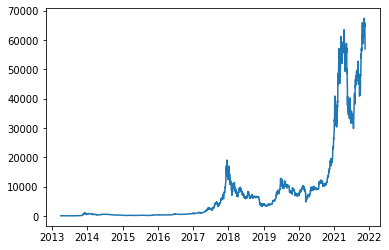

In [3]:
#show and save plot
plt.plot(data)
plt.savefig('bitcoin2013to2021DayByDay.png')

In [4]:
#split database to to smaller part
lenDateFrame = len(data)  
siezSplit = 100
splitSize = math.floor((lenDateFrame*(100-siezSplit))/100)
leftSize = lenDateFrame-splitSize
print('Size of split =',splitSize,'| Size left after split =',leftSize)

#split database to train and test part
leftDF = data.iloc[splitSize:]
df = data.iloc[splitSize:]
lenDateFrameLeft = len(leftDF)
sizeOfTrain = 85
trainSize = math.floor((lenDateFrameLeft*(sizeOfTrain))/100)
testSize = lenDateFrameLeft-trainSize
train = leftDF.iloc[:trainSize]
test = leftDF.iloc[trainSize:]
print('Size of train =',trainSize,'| Size of left =',testSize)

Size of split = 0 | Size left after split = 3155
Size of train = 2681 | Size of left = 474


In [5]:
#scalar data

#scalar train data 
scaler = MinMaxScaler(feature_range=(0,1))
scaledData = scaler.fit_transform(train['Close'].values.reshape(-1,1))

In [6]:
predictionDays = 60

In [7]:
xTrain,yTrain = [],[]
for x in range(predictionDays, len(scaledData)):
    xTrain.append(scaledData[x-predictionDays:x,0])
    yTrain.append(scaledData[x,0])
xTrain, yTrain = np.array(xTrain), np.array(yTrain)
xTrain = np.reshape(xTrain, (xTrain.shape[0], xTrain.shape[1], 1))

In [8]:
model = Sequential()

model.add(LSTM(units=100,return_sequences=True,input_shape=(xTrain.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 60, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            30200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [10]:
model.fit(xTrain,yTrain,epochs=50,batch_size=32)            

Epoch 1/50
82/82 [==============================] - 23s 190ms/step - loss: 0.0062
Epoch 2/50
82/82 [==============================] - 15s 187ms/step - loss: 0.0019
Epoch 3/50
82/82 [==============================] - 15s 186ms/step - loss: 0.0019
Epoch 4/50
82/82 [==============================] - 15s 183ms/step - loss: 0.0015
Epoch 5/50
82/82 [==============================] - 15s 184ms/step - loss: 0.0016
Epoch 6/50
82/82 [==============================] - 15s 183ms/step - loss: 0.0013
Epoch 7/50
82/82 [==============================] - 15s 184ms/step - loss: 0.0013
Epoch 8/50
82/82 [==============================] - 15s 186ms/step - loss: 0.0012
Epoch 9/50
82/82 [==============================] - 16s 189ms/step - loss: 0.0012
Epoch 10/50
82/82 [==============================] - 15s 187ms/step - loss: 0.0011
Epoch 11/50
82/82 [==============================] - 15s 186ms/step - loss: 0.0010
Epoch 12/50
82/82 [==============================] - 15s 188ms/step - loss: 0.0010
Epoch 13/50
8

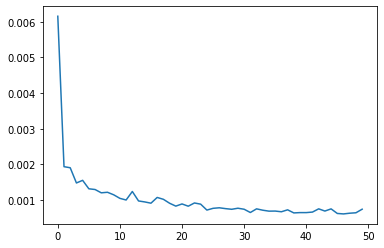

In [11]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [12]:
actualPrices = test['Close'].values
totalDataset = pd.concat((train['Close'], test['Close']), axis=0)
modelInputs = totalDataset[len(totalDataset)-len(test)-predictionDays:].values
modelInputs = modelInputs.reshape(-1,1)
modelInputs = scaler.fit_transform(modelInputs)
xTest = []
for x in range(predictionDays, len(modelInputs)):
    xTest.append(modelInputs[x-predictionDays:x,0])

xTest = np.array(xTest)
xTest = np.reshape(xTest, (xTest.shape[0], xTest.shape[1], 1))

predictionPrice = model.predict(xTest)
predictionPrice = scaler.inverse_transform(predictionPrice) 

In [13]:
cryptoCurrency = 'BTC'

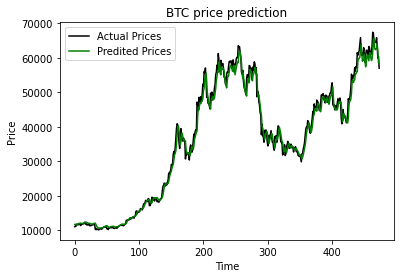

<Figure size 432x288 with 0 Axes>

In [14]:
plt.plot(actualPrices, color='black', label='Actual Prices')
plt.plot(predictionPrice, color='green', label='Predited Prices')
plt.title(f'{cryptoCurrency} price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()
plt.savefig('predictionPrice-VS-ActualPrice.png')